<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/Disease Prediction/Training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Disease Prediction/Testing.csv')
print(train_data.head())
print(test_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

# Data exploration and cleaning

# checking for missing value

In [3]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


# drop rows with missing value

In [7]:
# Drop the extra column from training dataset
if 'Unnamed: 133' in train_data.columns:
    train_data.drop(columns=['Unnamed: 133'], inplace=True)

# Encode Categorical Variables

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['prognosis'] = label_encoder.fit_transform(train_data['prognosis'])
test_data['prognosis'] = label_encoder.transform(test_data['prognosis'])
print(train_data.head())
print(test_data.head())


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

# Feature and target seperation

In [10]:
X_train = train_data.drop('prognosis', axis=1)
y_train= train_data['prognosis']
X_test = test_data.drop('prognosis', axis=1)
y_test = test_data['prognosis']



# scale numerical feature

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



# Build and Train the Neural Network Model

# Define the model

# Train the model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
num_classes = len(y_train.unique())  # Number of unique classes in your target

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
123/123 [==============================] - 2s 7ms/step - loss: 1.6497 - accuracy: 0.7068 - val_loss: 0.1802 - val_accuracy: 1.0000
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9997 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 6.6391e-04 - val_accuracy: 1.0000
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.6802e-04 - val_accuracy: 1.000

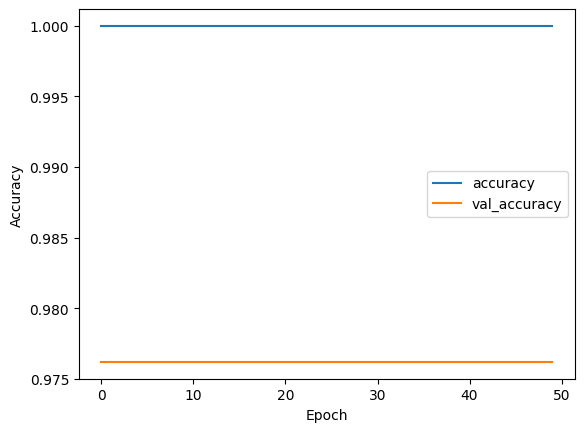

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# improving model performance

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping



model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
123/123 [==============================] - 3s 8ms/step - loss: 4.4032 - accuracy: 0.1476 - val_loss: 3.0578 - val_accuracy: 0.8537
Epoch 2/100
123/123 [==============================] - 1s 5ms/step - loss: 3.1195 - accuracy: 0.4078 - val_loss: 1.8505 - val_accuracy: 0.9756
Epoch 3/100
123/123 [==============================] - 1s 9ms/step - loss: 2.4581 - accuracy: 0.5442 - val_loss: 1.2582 - val_accuracy: 0.9756
Epoch 4/100
123/123 [==============================] - 1s 9ms/step - loss: 2.0495 - accuracy: 0.6296 - val_loss: 0.9634 - val_accuracy: 1.0000
Epoch 5/100
123/123 [==============================] - 2s 13ms/step - loss: 1.8553 - accuracy: 0.6568 - val_loss: 0.8174 - val_accuracy: 1.0000
Epoch 6/100
123/123 [==============================] - 1s 9ms/step - loss: 1.6743 - accuracy: 0.6964 - val_loss: 0.7230 - val_accuracy: 1.0000
Epoch 7/100
123/123 [==============================] - 1s 5ms/step - loss: 1.5693 - accuracy: 0.7109 - val_loss: 0.6623 - val_accuracy: 1.000

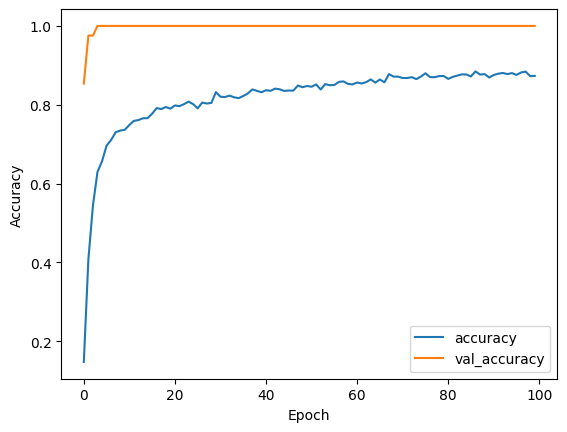

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()